Importar librerias


In [1]:
!pip install -Uqq fastai 
#!pip install timm


from fastai.vision import *
from pathlib import Path
import json



In [2]:
import timm

In [3]:
from fastai.vision.all import *


Descargar los datos

In [4]:
from fastai.data.external import untar_data, URLs

#path = untar_data(URLs.FLOWERS)
#path.ls()

In [5]:
ruta = 'C:/Users/Mateo/.fastai/data/oxford-102-flowers/'
import pandas as pd


In [6]:
train_txt = pd.read_csv(ruta+'train.txt', sep =' ', names=['nombre', 'index'])
print('Hay un total de ', train_txt.shape[0],' registros en el set de entrenamiento.')

test_txt = pd.read_csv(ruta+'test.txt', sep =' ', names=['nombre', 'index'])
print('Hay un total de ', test_txt.shape[0],' registros en el set de test.')

val_txt = pd.read_csv(ruta+'valid.txt', sep =' ', names=['nombre', 'index'])
print('Hay un total de ', val_txt.shape[0],' registros en el set de validación.')

categorias = pd.read_csv(ruta+'/cats.csv')
categorias = categorias.to_dict()['Name']

Hay un total de  1020  registros en el set de entrenamiento.
Hay un total de  6149  registros en el set de test.
Hay un total de  1020  registros en el set de validación.


Cambiar el numero de la categoría por palabras

In [7]:
train_txt["label"] = train_txt['index'].map(categorias)
#train_txt.drop(columns='cat',inplace=True)

test_txt["label"] = test_txt['index'].map(categorias)
#test_txt.drop(columns='cat',inplace=True)

val_txt["label"] = val_txt['index'].map(categorias)
#val_txt.drop(columns='cat',inplace=True)


In [8]:
val_txt.head(1)

,nombre,index,label
0,jpg/image_04467.jpg,89,canna lily


Crear columna para identificar el set de validación y el set de entrenamiento

In [9]:
train_txt['is_valid'] =False
val_txt['is_valid']=True

Ponerle el nombre de la ruta entera a cada observación

In [10]:
df = pd.concat([train_txt,val_txt])
df.nombre = df.nombre.apply(lambda x: f'{ruta}/{x}')


In [11]:
df.head(1)

,nombre,index,label,is_valid
0,C:/Users/Mateo/.fastai/data/oxford-102-flowers//jpg/image_03860.jpg,16,purple coneflower,False


In [12]:
# Se crea el transformador de las iagenes para definir el tamaño de las imagenes que utilizamos
objeto_transf = [RandomResizedCrop(500,min_scale=0.75, ratio=(1.,1.))]

# Se crea el batch_transf para hacerle los siguientes pasos a las imagenes:
# 1. Hacer data augmentation con un tamaño de 244 para aumentar la cantidad de ejemplos en el set
# 2. se normalizan las imagenes para mejorar el rendimiento del modelo segun los stats de imagenet.

batch_transf = [*aug_transforms(mult=2, size=244),Normalize.from_stats(*imagenet_stats)]

Creación del datablock

In [13]:
dblock = DataBlock(
    blocks=(ImageBlock,CategoryBlock),
    get_x = ColReader('nombre'),
    get_y = ColReader('label'),
    item_tfms=objeto_transf,
    batch_tfms=batch_transf,
    splitter=ColSplitter('is_valid')

)

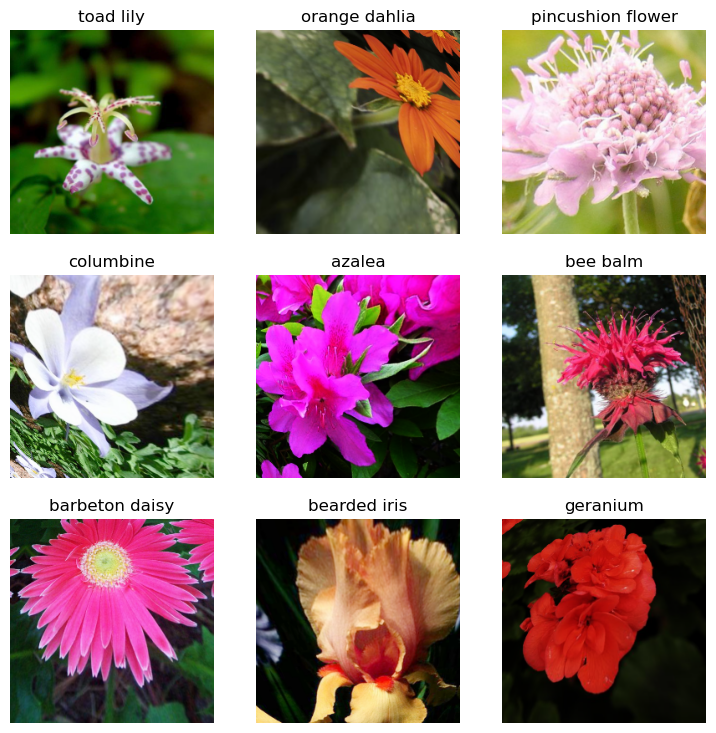

In [14]:
flores = dblock.dataloaders(df)
flores.show_batch()

In [15]:
# Usamos primero ResNet18 para entrenar
#learn_1 = vision_learner(flores, resnet18,metrics=error_rate)
#learn_1.fine_tune(4)

In [16]:
# Matriz de conf. para verificar como le va
#mat = ClassificationInterpretation.from_learner(learn_1)
#mat.plot_confusion_matrix()

In [17]:
#mat.plot_top_losses(5, nrows=5)


Modelo convnext_tiny_in22k

In [19]:
model = timm.create_model('convnext_tiny_in22k', pretrained=True, num_classes=flores.c)

learner_2 = Learner(flores, model, metrics= error_rate)
learner_2.fine_tune(4)




c:\Users\Mateo\anaconda3\lib\site-packages\timm\models\_factory.py:114: UserWarning: Mapping deprecated model name convnext_tiny_in22k to current convnext_tiny.fb_in22k.
  model = create_fn(


epoch,train_loss,valid_loss,error_rate,time
0,3.561163,1.602335,0.263725,30:10


epoch,train_loss,valid_loss,error_rate,time
0,0.623457,0.338581,0.033333,27:31
1,0.350424,0.282834,0.059804,31:56
2,0.226700,0.177433,0.032353,34:19
3,0.153568,0.159344,0.035294,33:14


In [20]:
learner_2.export()

In [21]:
path = Path()
path.ls(file_exts='.pkl')

(#1) [Path('export.pkl')]

In [5]:
learner_p = load_learner('export.pkl')

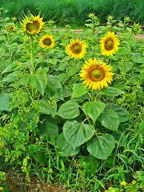

In [8]:
im = PILImage.create("girasol.jpg")
im.thumbnail((192,192))
im

In [9]:
learner_p.predict(im)

('sunflower',
 tensor(86),
 tensor([1.0986e-03, 5.5794e-04, 5.5035e-04, 1.2430e-04, 8.9899e-04, 9.7111e-04,
         7.0791e-03, 1.4539e-04, 5.8461e-04, 4.1699e-04, 7.2745e-04, 5.8306e-03,
         9.0706e-04, 1.9649e-02, 3.1608e-03, 4.8437e-04, 4.0038e-04, 1.3683e-03,
         1.3107e-03, 2.5852e-04, 5.1159e-04, 5.6091e-04, 5.0206e-04, 4.5525e-04,
         1.3865e-03, 4.7611e-04, 4.3142e-03, 2.9790e-04, 3.2508e-03, 1.0202e-03,
         3.3104e-04, 8.5166e-04, 1.9810e-04, 2.5019e-03, 3.4154e-04, 5.1593e-04,
         2.6003e-04, 4.4386e-04, 1.3896e-03, 6.6367e-04, 2.2509e-03, 4.5689e-04,
         1.1656e-03, 1.0033e-03, 2.4776e-03, 5.7225e-04, 1.4711e-03, 3.4327e-04,
         3.4902e-03, 5.2470e-04, 3.2621e-03, 1.3372e-03, 4.2226e-04, 9.3094e-04,
         1.5245e-03, 5.5777e-04, 1.2455e-03, 1.3045e-03, 1.1239e-03, 3.6642e-04,
         2.1928e-04, 4.3704e-04, 1.3766e-03, 1.1660e-03, 9.4540e-04, 2.0464e-03,
         2.8491e-03, 8.7360e-04, 2.4199e-04, 1.2737e-03, 2.2685e-03, 1.1841e-03,
 

In [11]:
import pathlib
temp = pathlib.PosixPath
pathlib.PosixPath = pathlib.WindowsPath

In [12]:
learner_p.export()